In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

CART is a classification and Regression algorithm
It uses decision tress for the prediction
The hyperparameters here are - Stoping criteria,

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

In [3]:
import pandas as pd
import os

# Specify the directory path where the Excel files are located
directory_path = 'D:\combo_IC50_skew_kurt_data'  # Replace with the actual directory path

# Get a list of Excel files in the specified directory
csv_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the concatenated data
concatenated_df = pd.DataFrame()

# Loop through the Excel files and concatenate them
for file in csv_files:
    df = pd.read_csv(file)  # Read each Excel file
    concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

# Now, 'concatenated_df' contains the combined data from all Excel files in the specified directory.

# You can further process or save the concatenated DataFrame as needed.


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\combo_IC50_skew_kurt_data\\validation\\chunk_9.csv'

In [4]:
valid_data = pd.read_csv(r'D:\combo_IC50_skew_kurt_data\validation\chunk_7.csv')

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your CSV dataset (replace 'your_dataset.csv' with the actual file path)
# Load your csv file here

# creating  x and y
# Separate the input features (X) and target labels (Y)
X = concatenated_df.drop(columns=['Combo IC50'])  # Replace 'target_column_name' with the actual column name of the target variable
Y = concatenated_df['Combo IC50']

# encoding
# Instantiate the MultiColumnLabelEncoder
#mcle = MultiColumnLabelEncoder()

# Encode categorical columns in the DataFrame
#X_encoded = mcle.fit_transform(X)

#print(X_encoded.head())

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=254)

# Standardize the input features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
X_valid = valid_data.drop('Combo IC50', axis = 1)
Y_valid = valid_data['Combo IC50']


Data Splitting: The CART algorithm starts with the entire dataset, which consists of a set of input features (independent variables) and corresponding target values (dependent variable) that you want to predict. The algorithm begins by selecting a feature and a threshold to split the data into two subsets. The goal is to create subsets that minimize the variance of the target variable within each subset.

Recursive Binary Splitting: After the initial split, the algorithm recursively repeats the process for each subset, further splitting them into smaller subsets. It continues this recursive binary splitting until a stopping criterion is met. This criterion could be a maximum depth for the tree, a minimum number of samples in a node, or other conditions that help prevent overfitting.

Regression Prediction: Once the tree is built, the prediction for a new data point is made by traversing the tree from the root node to a leaf node. At each internal node, a decision is made based on the value of a specific feature, and the algorithm follows the appropriate branch. When it reaches a leaf node, the predicted value for the target variable is determined. In the case of regression, the predicted value is typically the mean (average) of the target values in that leaf node.

when you want to use the CART algorithm for regression, you utilize a Decision Tree Regressor as the underlying model to create the regression tree. The goal is to find the best splits in the data to minimize the prediction error (e.g., mean squared error) and generate a predictive model.

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters
max_depth = 50  # Adjust max_depth for tree depth control
min_samples_split = 10  # Minimum number of samples required to split a node
min_samples_leaf = 5  # Minimum number of samples required in a leaf node
max_features = None  # Number of features to consider at each split (None means all features)
max_leaf_nodes = 100  # Maximum number of leaf nodes (None means unlimited)

# Create the DecisionTreeRegressor with hyperparameters
cart_model = DecisionTreeRegressor(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    max_leaf_nodes=max_leaf_nodes,
    random_state=42  # You can set a specific random seed for reproducibility
)

# Fit the model to the training data
cart_model.fit(X_train, Y_train)

# Now, you have a DecisionTreeRegressor with the specified hyperparameters.


DecisionTreeRegressor(max_depth=50, max_leaf_nodes=100, min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Mean Squared Error: 0.28530690215639354
Root Mean Squared Error: 0.5341412754659516
Mean Absolute Error: 0.39757425890044856
R-squared: 0.9740417321157119
Explained Variance Score: 0.9740417345132424
Mean Squared Error (validation set): 0.29161080159891706
Root Mean Squared Error (validation set): 0.5400100013878605
Mean Absolute Error (validation set): 0.4001159733242116
R-squared (validation set): 0.9740010921406007
Explained Variance Score (validation set): 0.9740011064477152
Cross-Validation Scores: [0.98101072 0.97926243 0.97704427 0.98047043 0.97936544 0.98040765
 0.97980449 0.9785441 ]


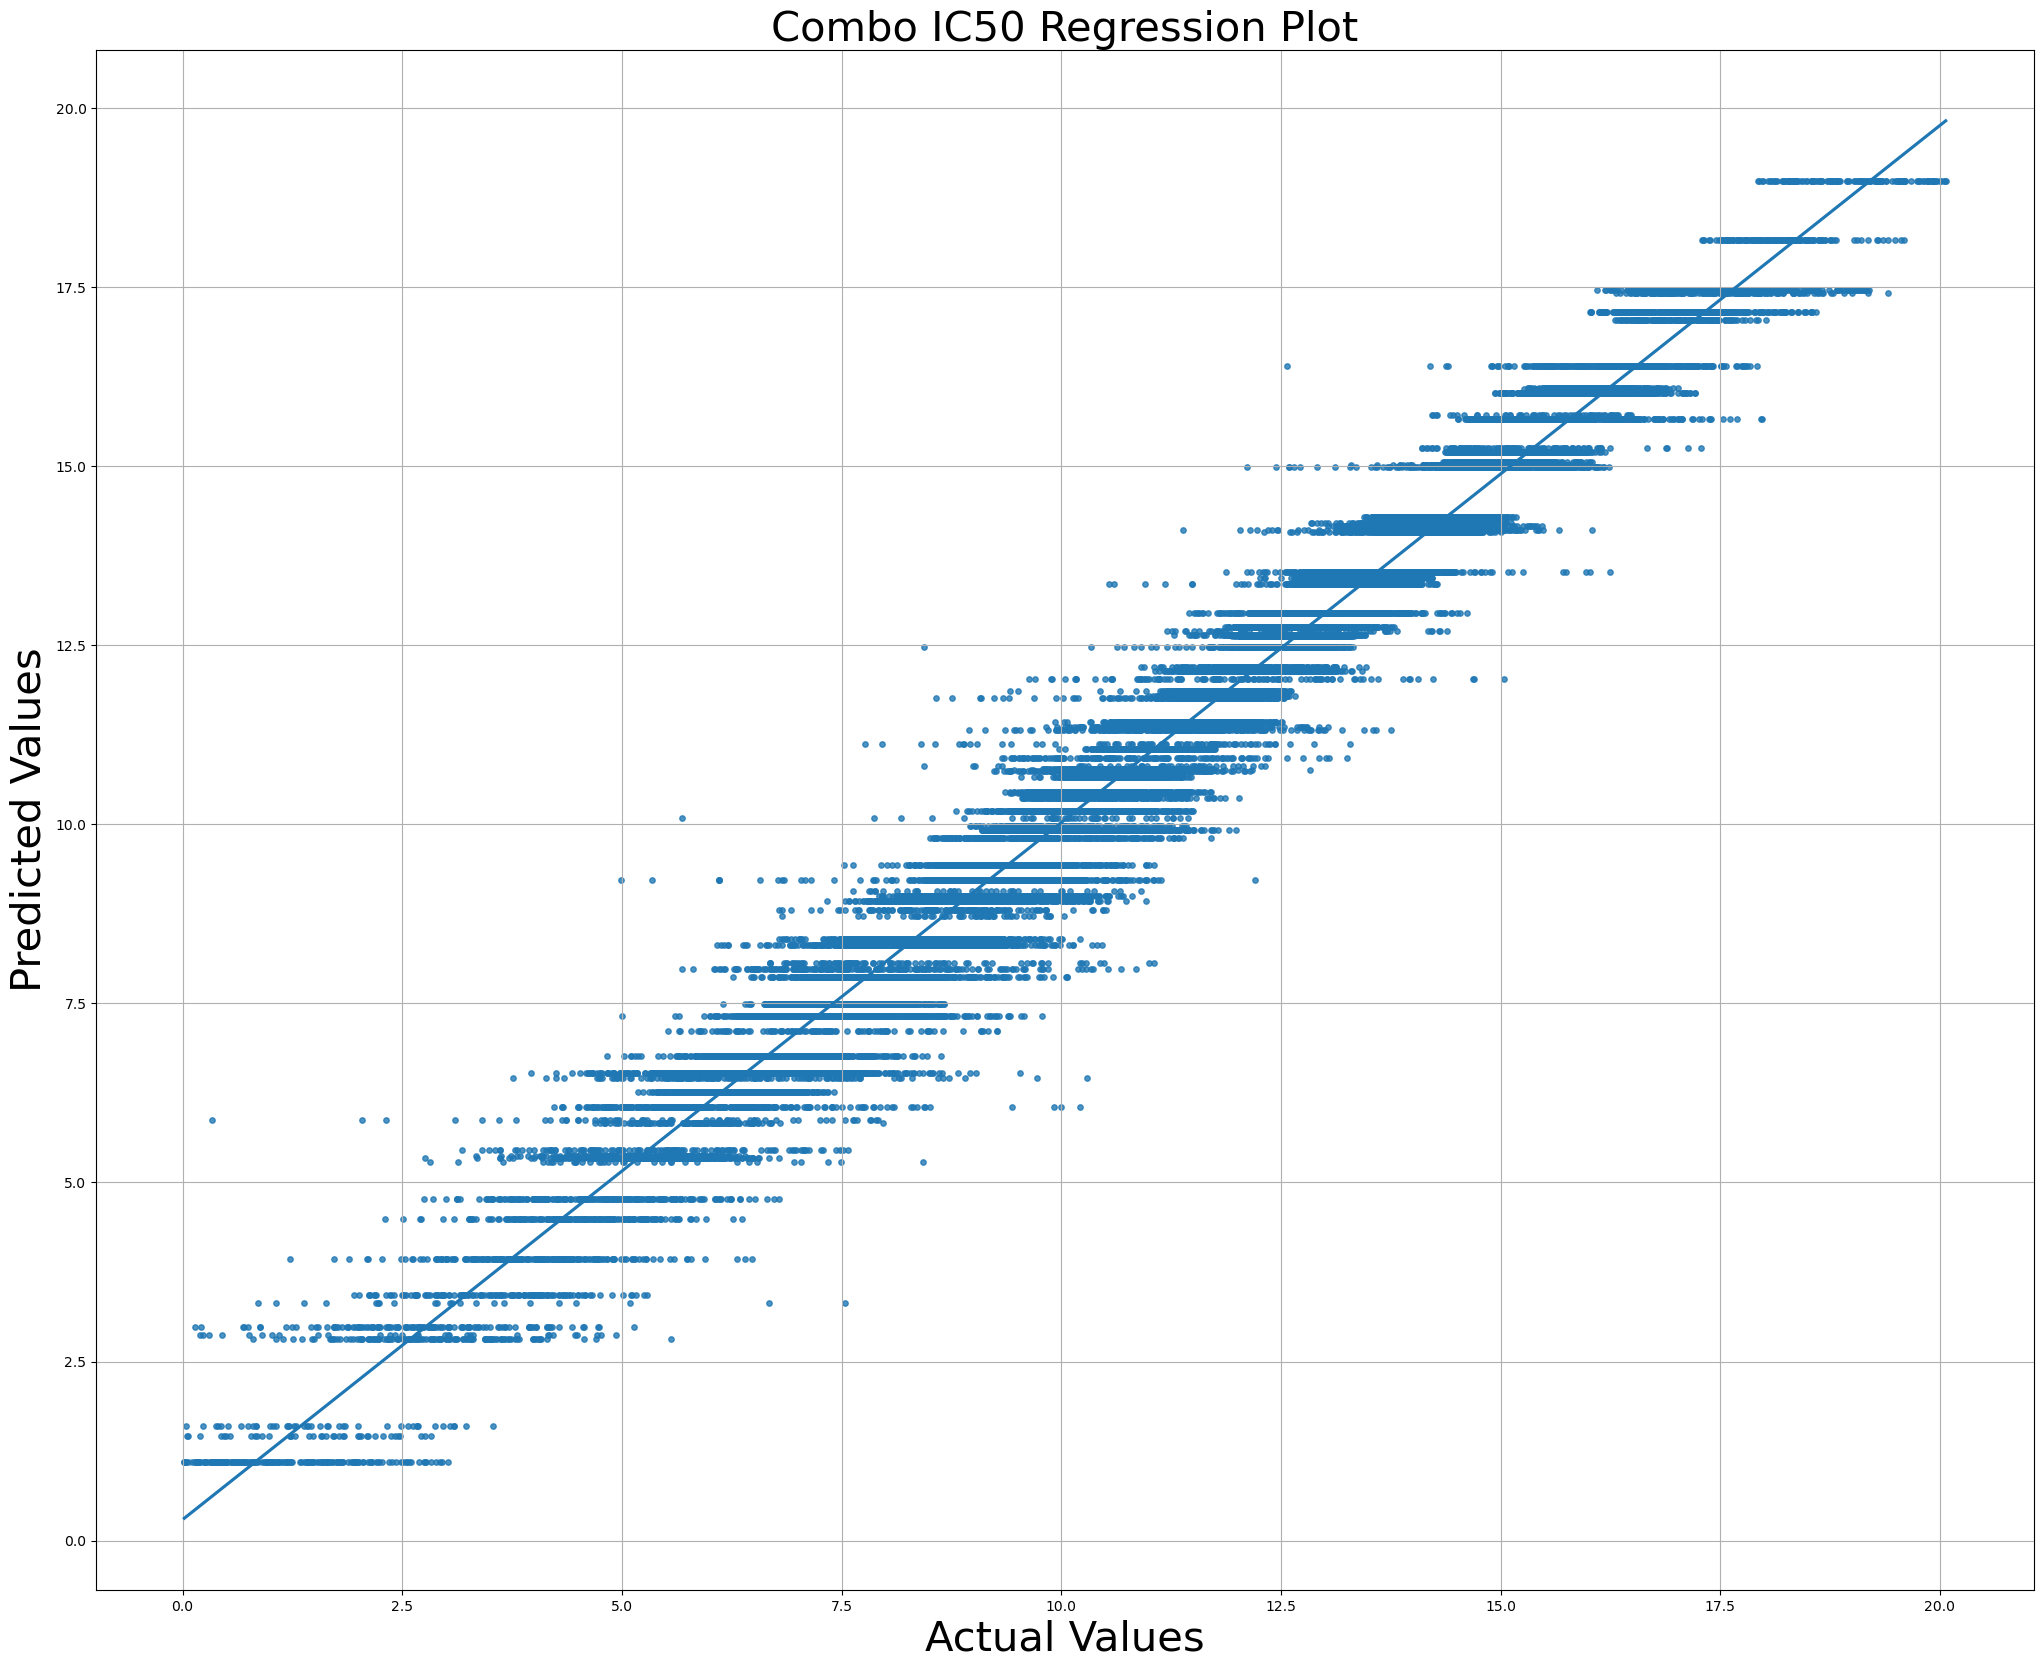

43084 43084


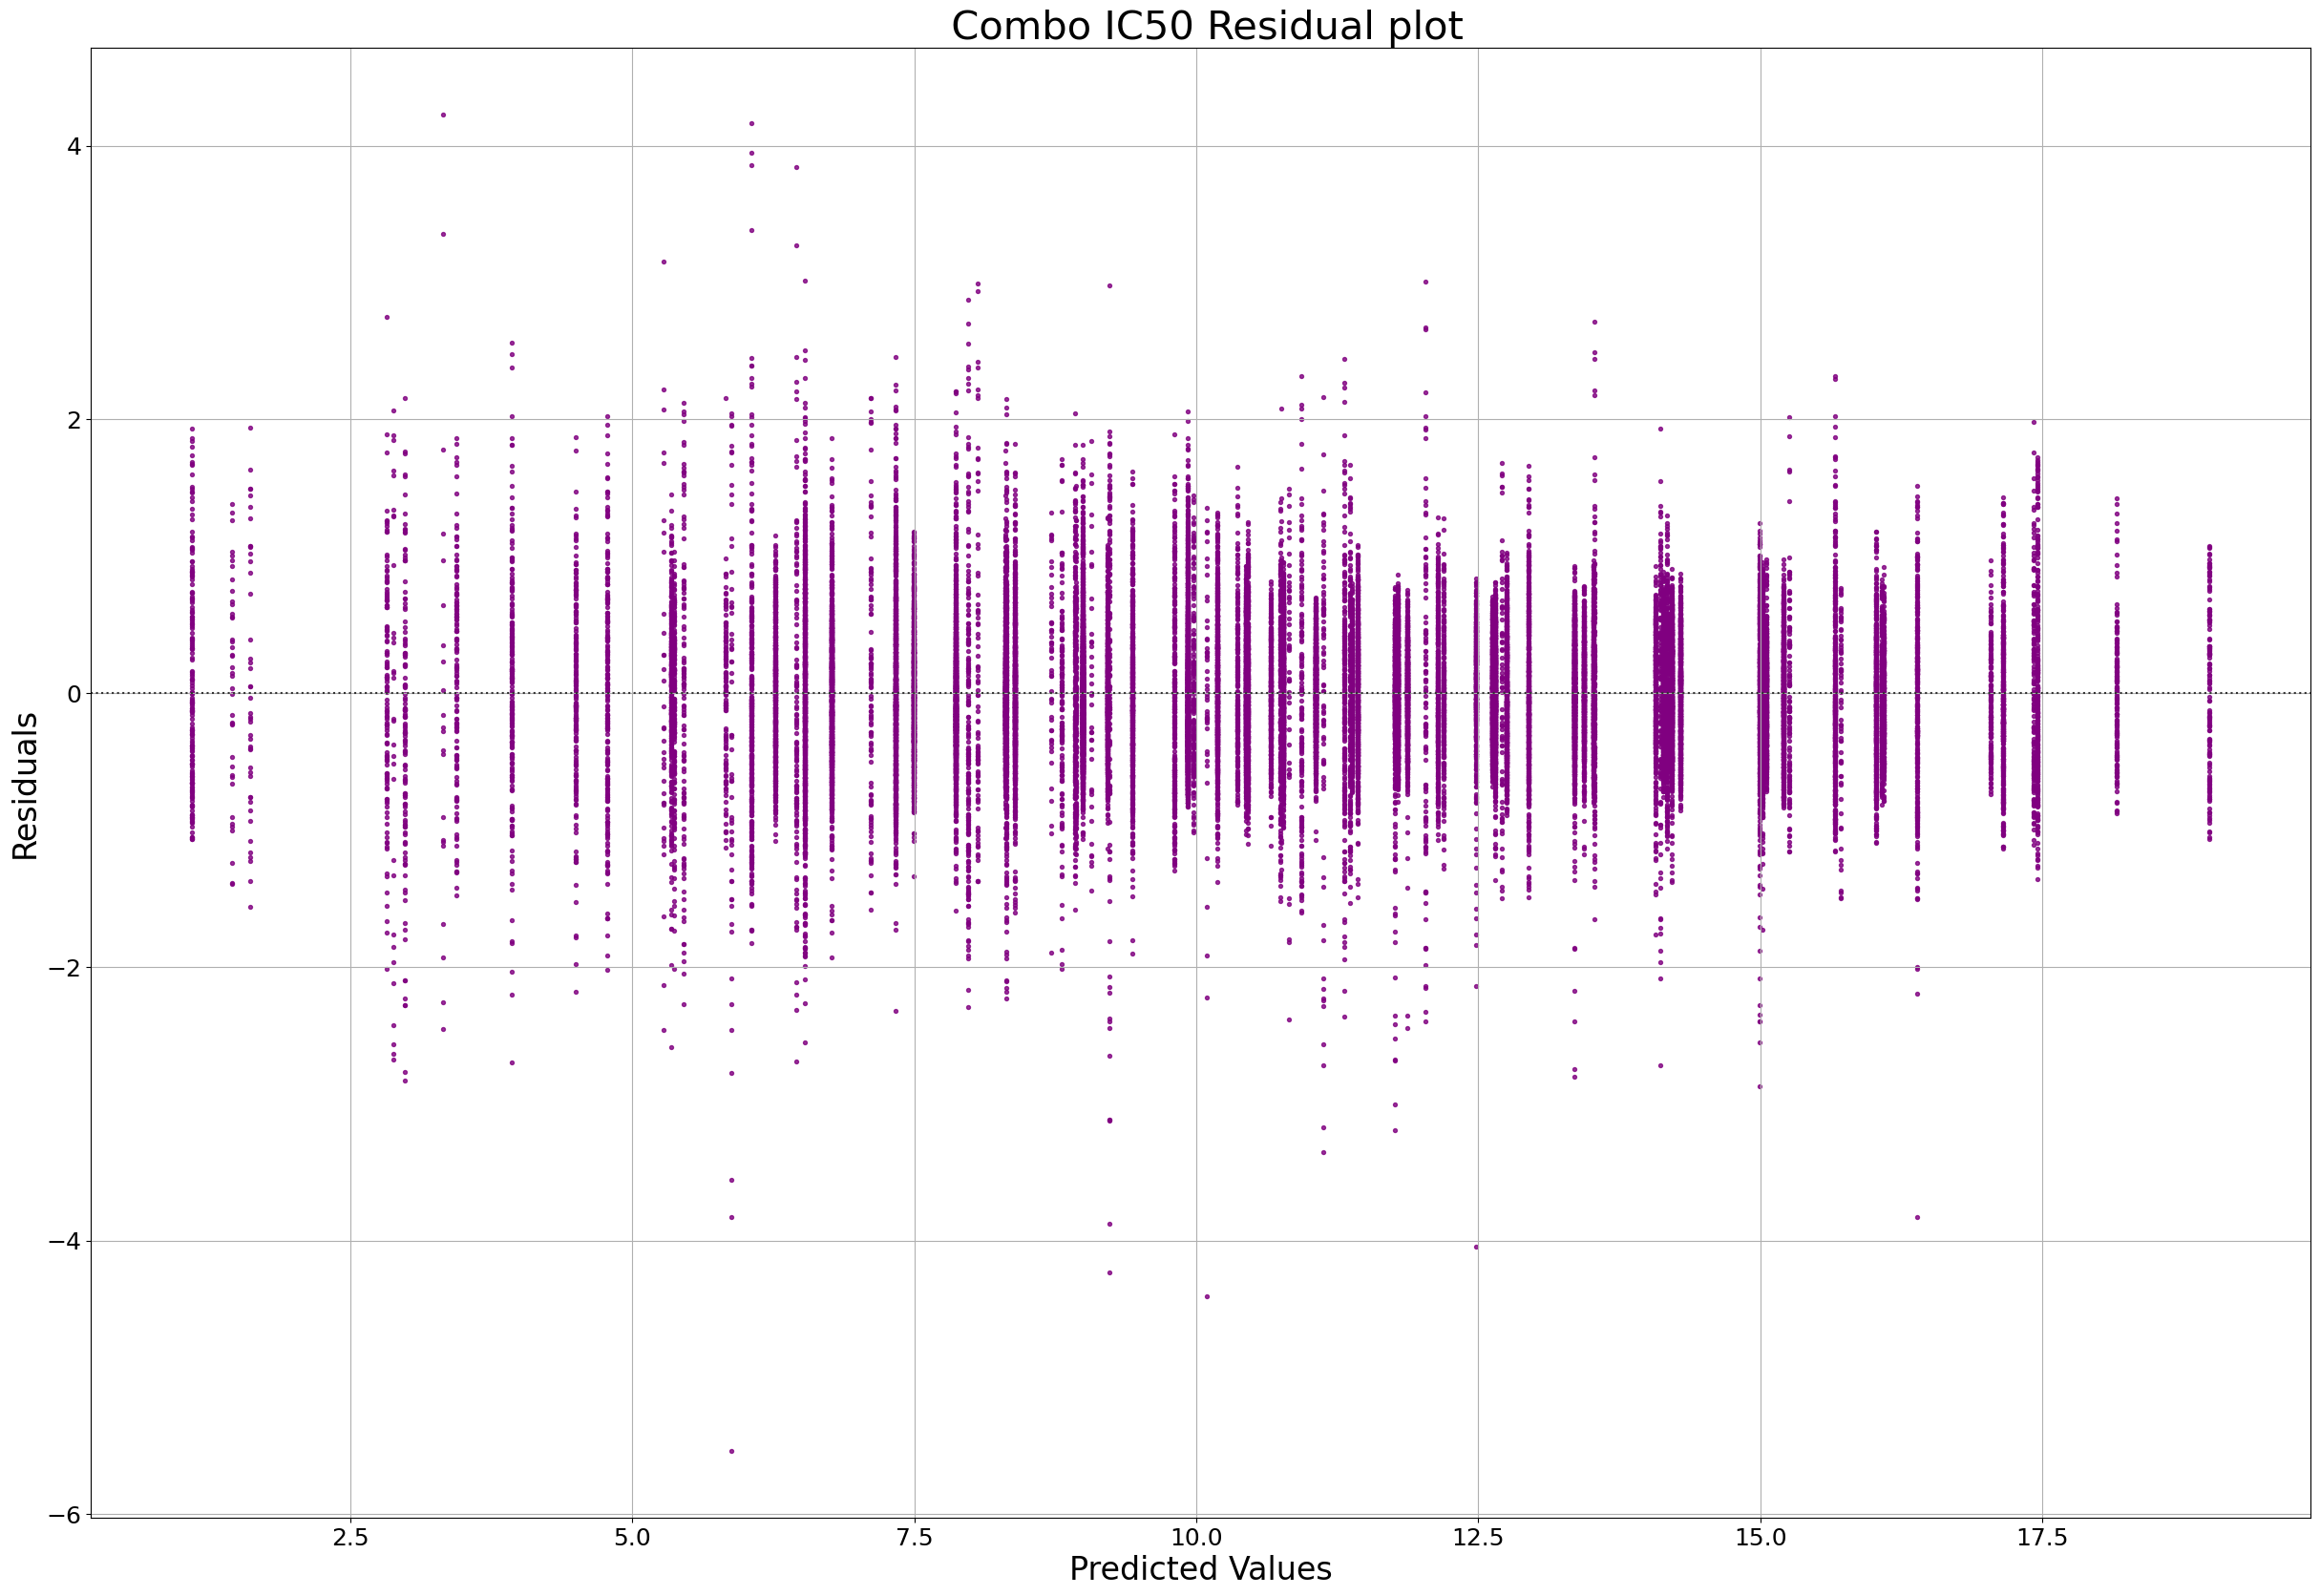

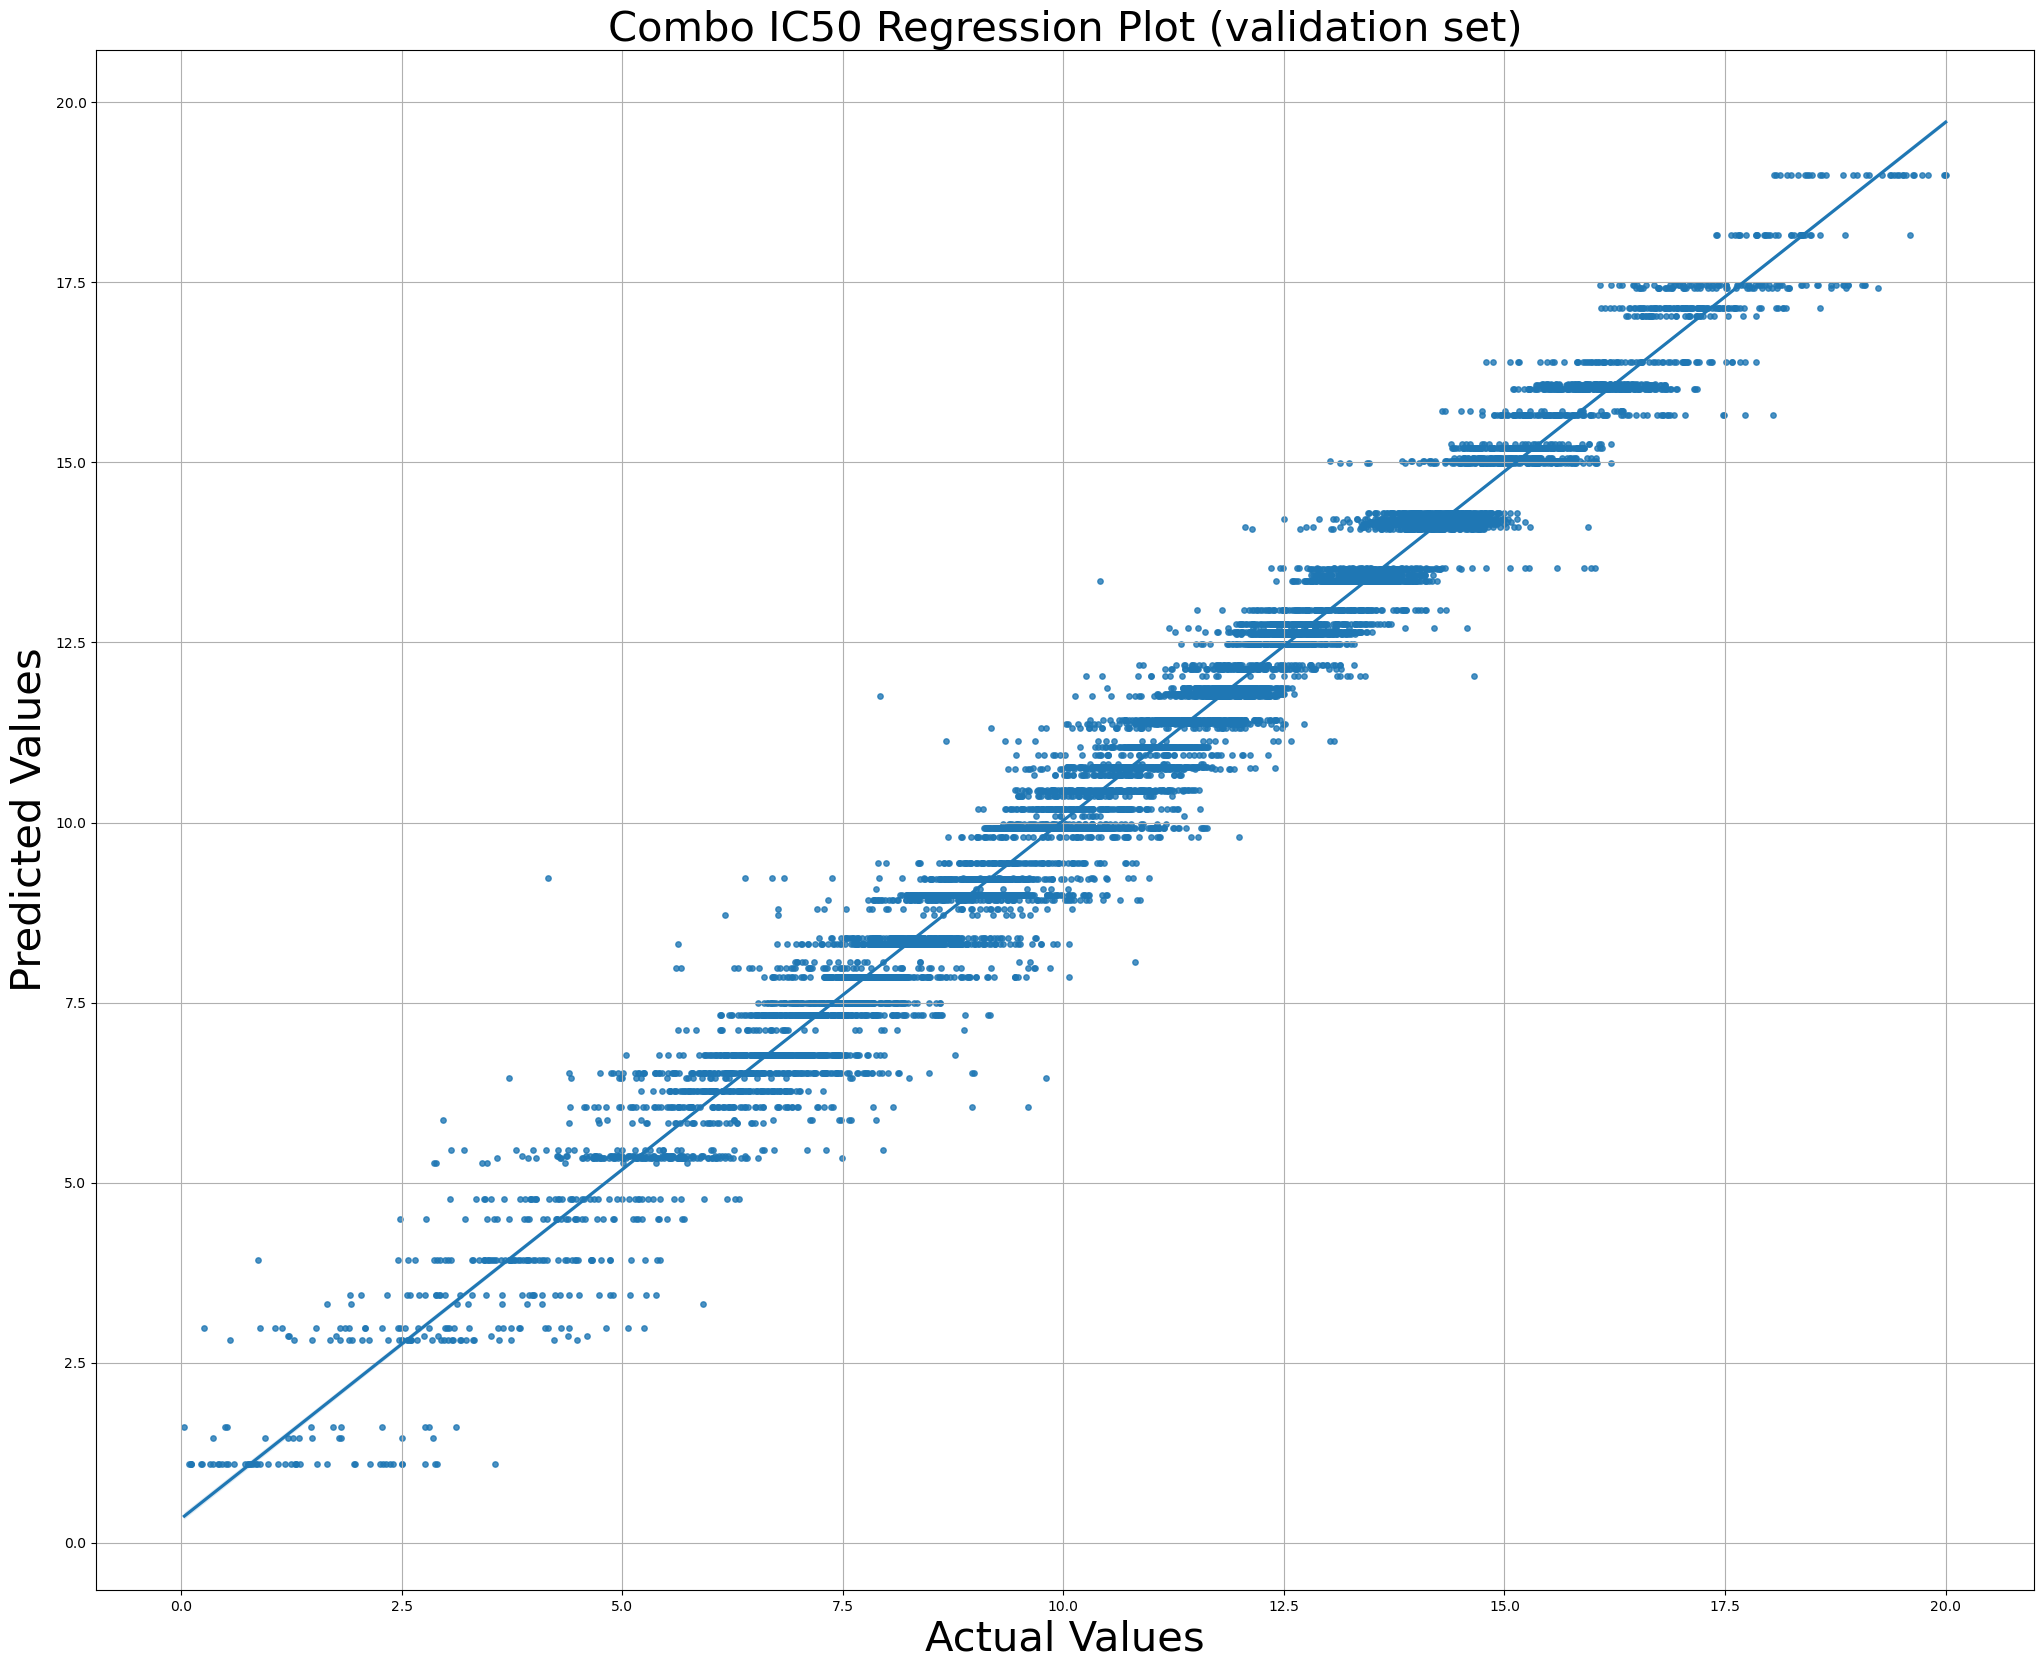

10000 10000


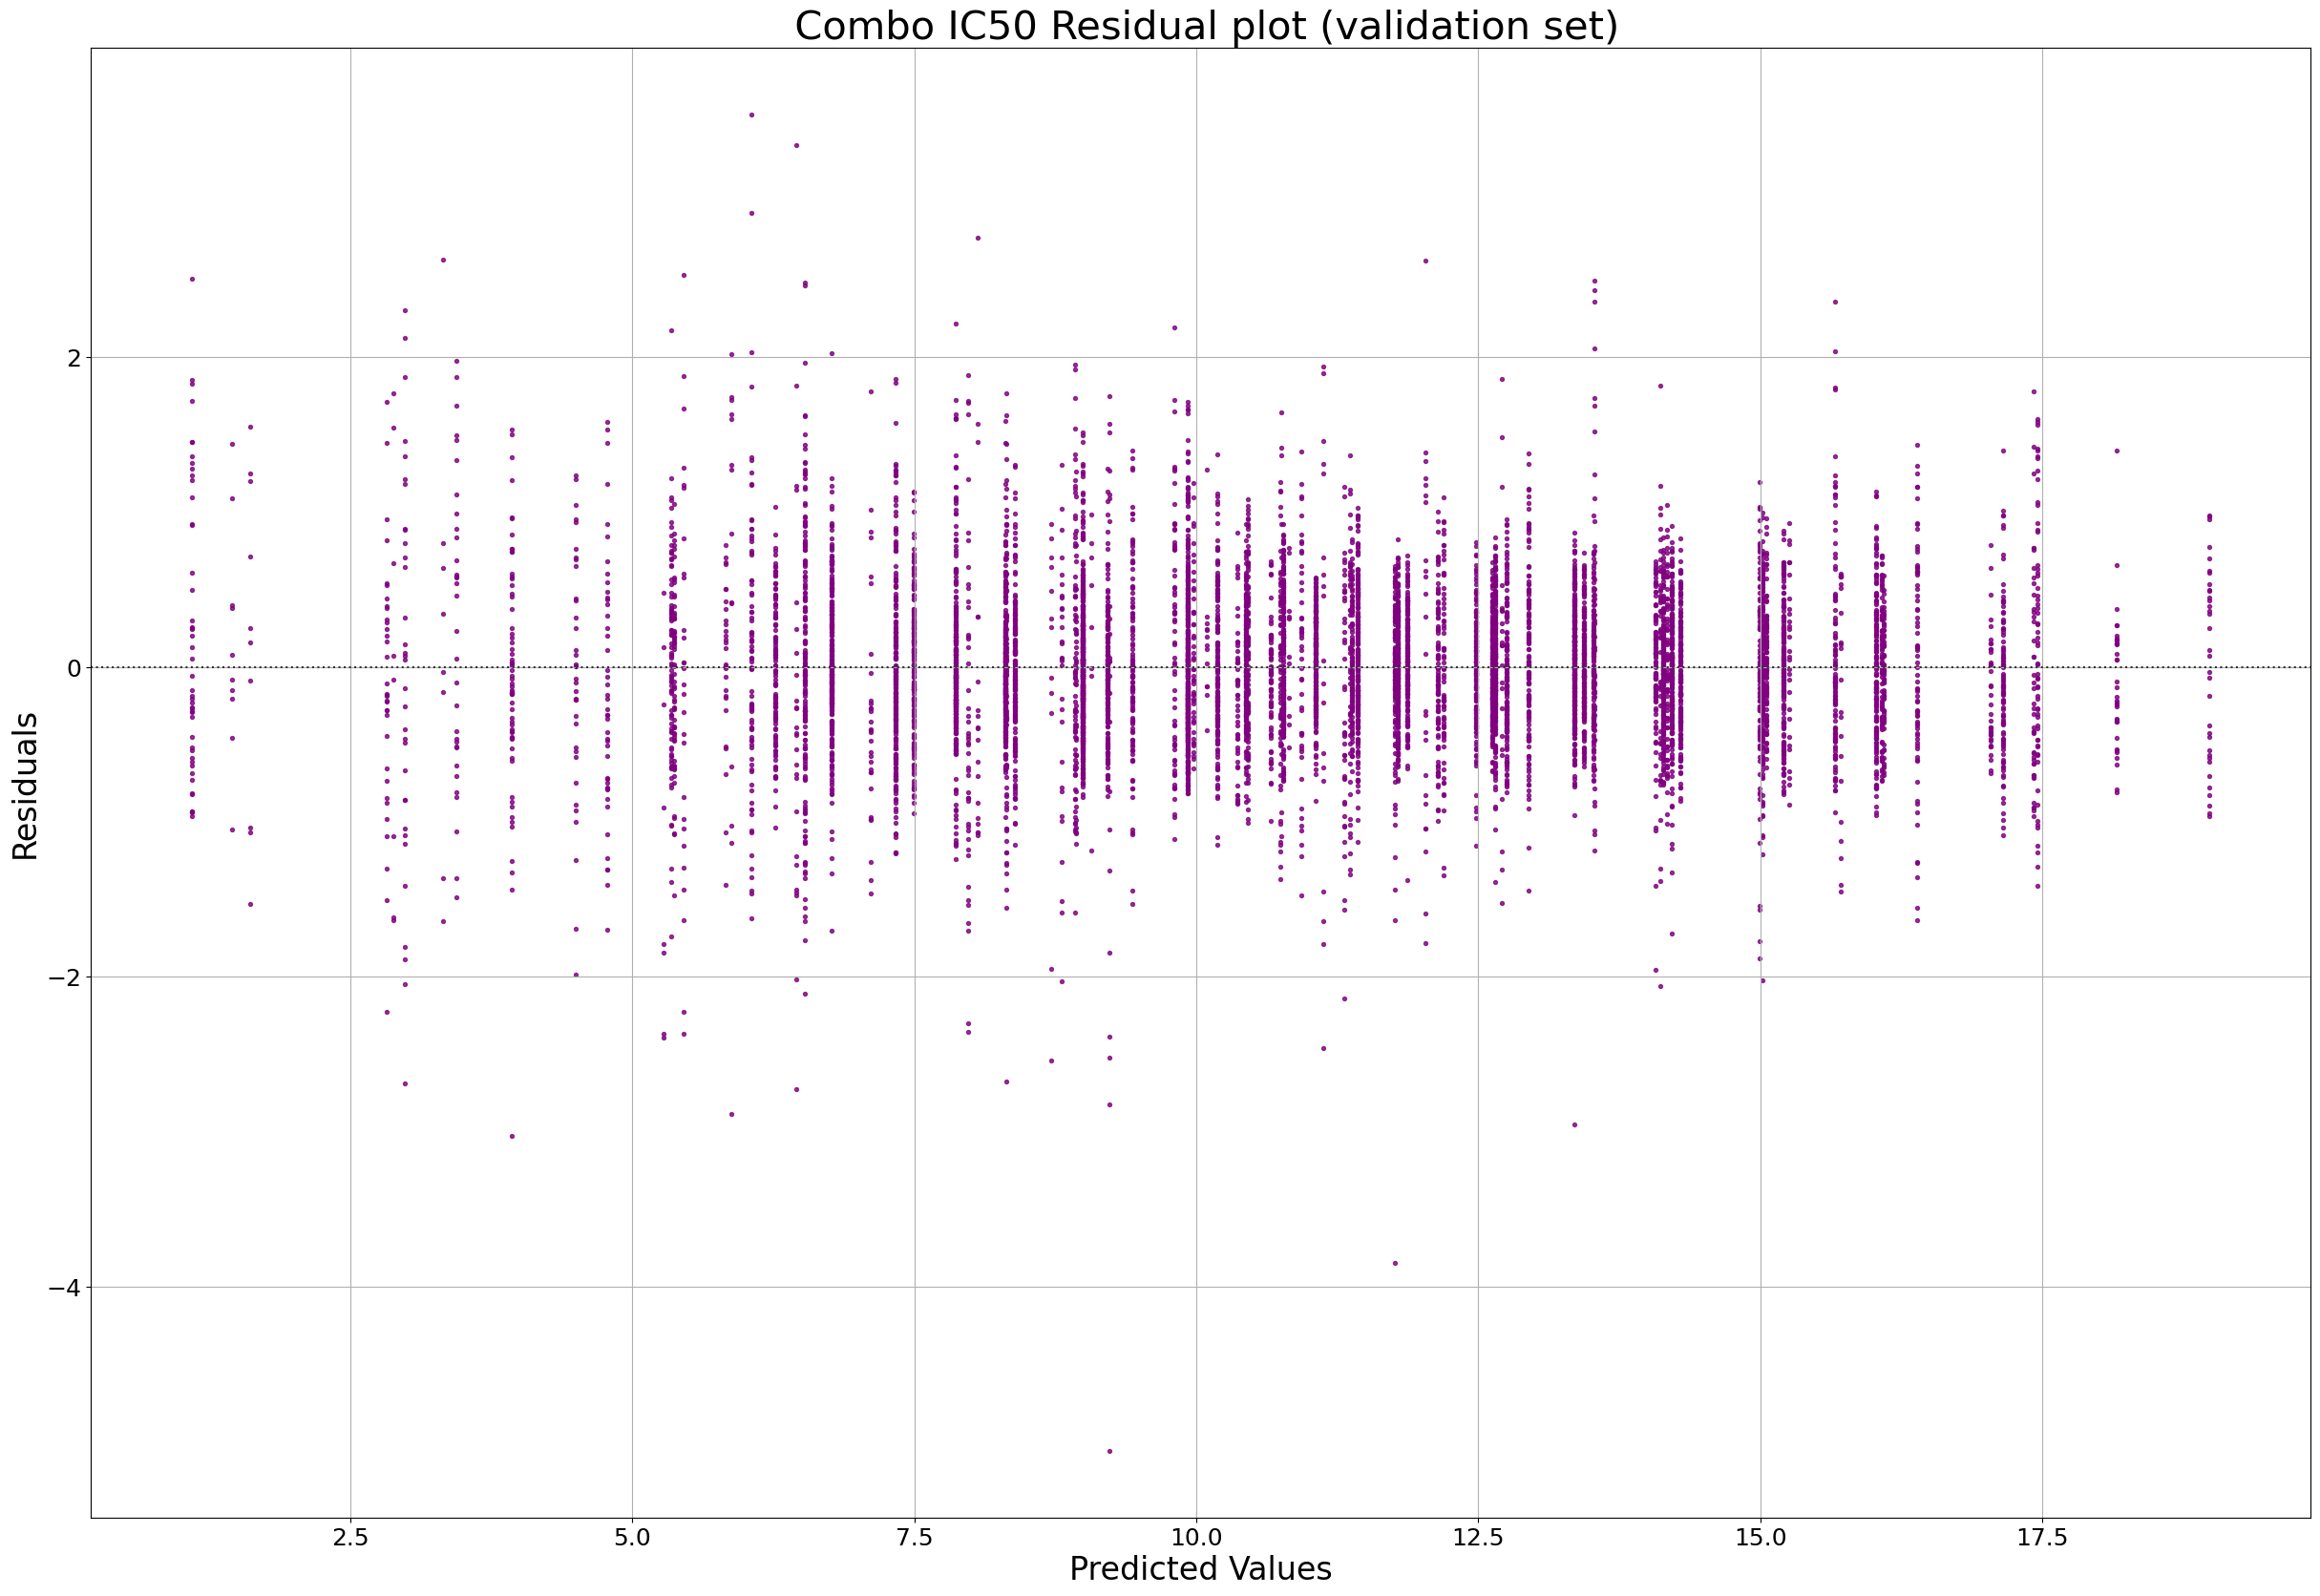

In [9]:
# Make predictions on the test data
Y_pred = cart_model.predict(X_test)
Y_valid_pred = cart_model.predict(X_valid)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)
evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

# for validation set
import numpy as np
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mae = mean_absolute_error(Y_valid, Y_valid_pred)
print("Mean Absolute Error (validation set):", mae)
r2 = r2_score(Y_valid, Y_valid_pred)
print("R-squared (validation set):", r2)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


# validation data plots

# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
Y_valid_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define hyperparameters
max_depth = 500  # Adjust max_depth for tree depth control
min_samples_split = 10  # Minimum number of samples required to split a node
min_samples_leaf = 5  # Minimum number of samples required in a leaf node
max_features = None  # Number of features to consider at each split (None means all features)
max_leaf_nodes = 500  # Maximum number of leaf nodes (None means unlimited)

# Create the DecisionTreeRegressor with hyperparameters
cart_model1 = DecisionTreeRegressor(
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    max_leaf_nodes=max_leaf_nodes,
    random_state=42  # You can set a specific random seed for reproducibility
)

# Fit the model to the training data
cart_model1.fit(X_train, Y_train)

# Now, you have a DecisionTreeRegressor with the specified hyperparameters.


DecisionTreeRegressor(max_depth=500, max_leaf_nodes=500, min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

Mean Squared Error: 0.08456567332997054
Root Mean Squared Error: 0.29080177669672264
Mean Absolute Error: 0.21233519538274445
R-squared: 0.9923059050253497
Explained Variance Score: 0.9923059076728561
Mean Squared Error (validation set): 0.08431884105884388
Root Mean Squared Error (validation set): 0.2903770670332695
Mean Absolute Error (validation set): 0.2132175939832639
R-squared (validation set): 0.9924824534362915
Explained Variance Score (validation set): 0.9924840769968516
Cross-Validation Scores: [0.98101072 0.97926243 0.97704427 0.98047043 0.97936544 0.98040765
 0.97980449 0.9785441 ]


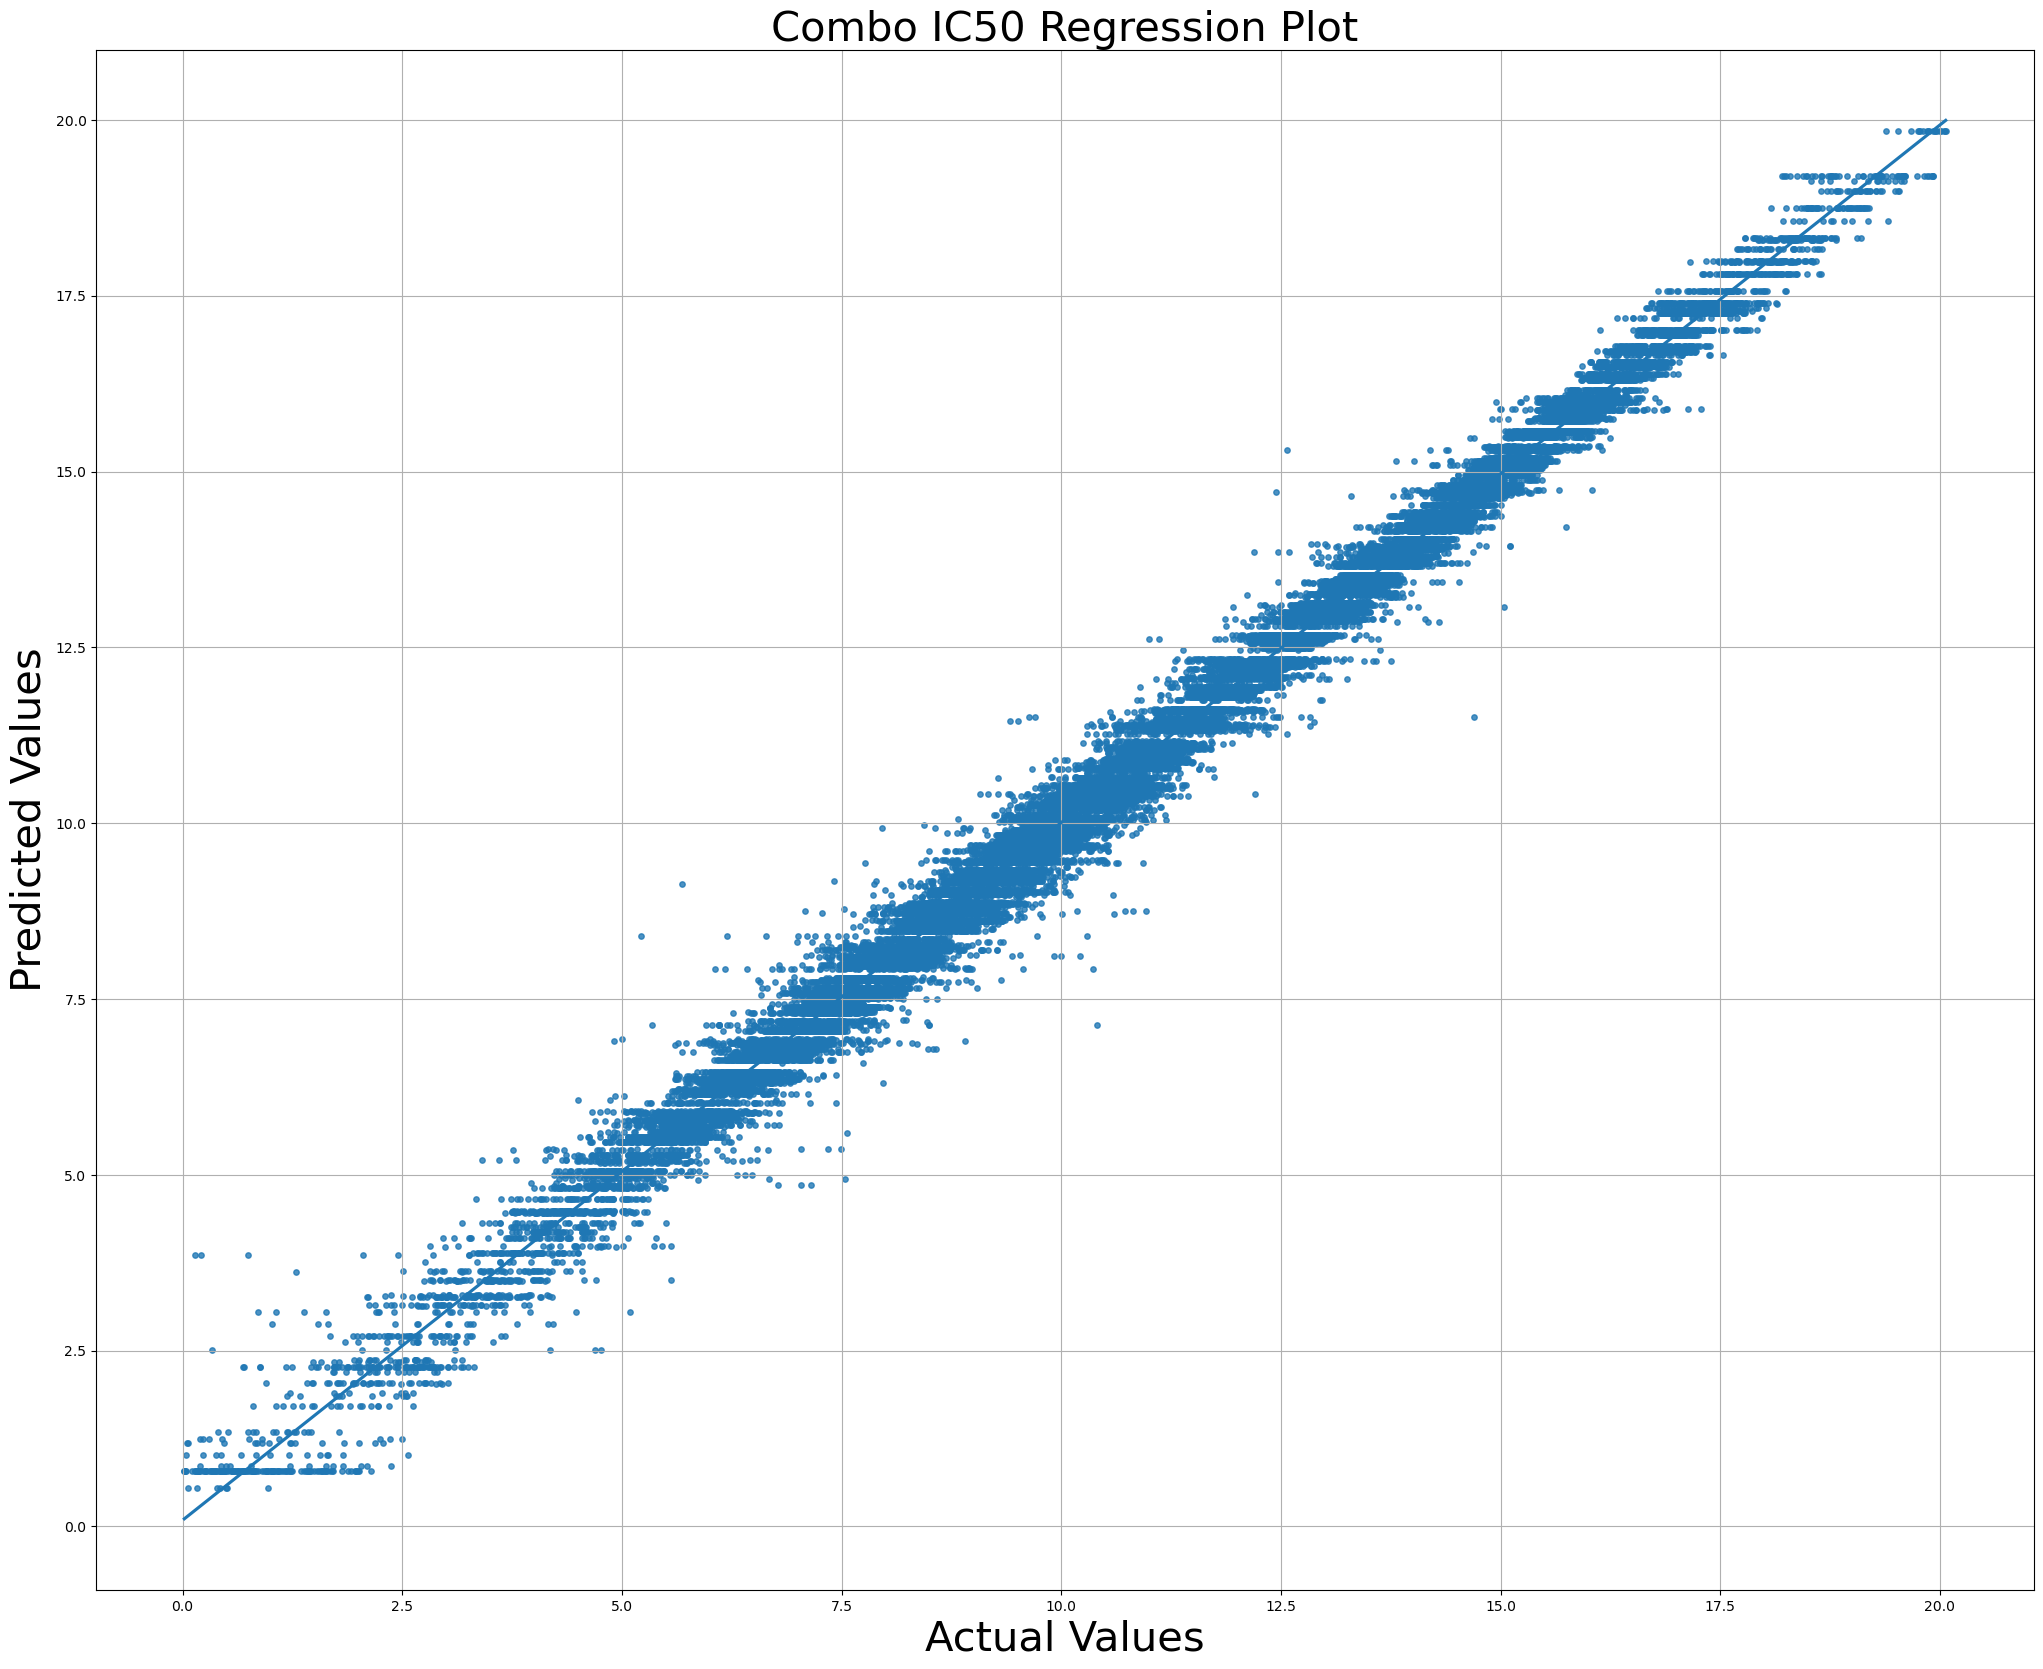

43084 43084


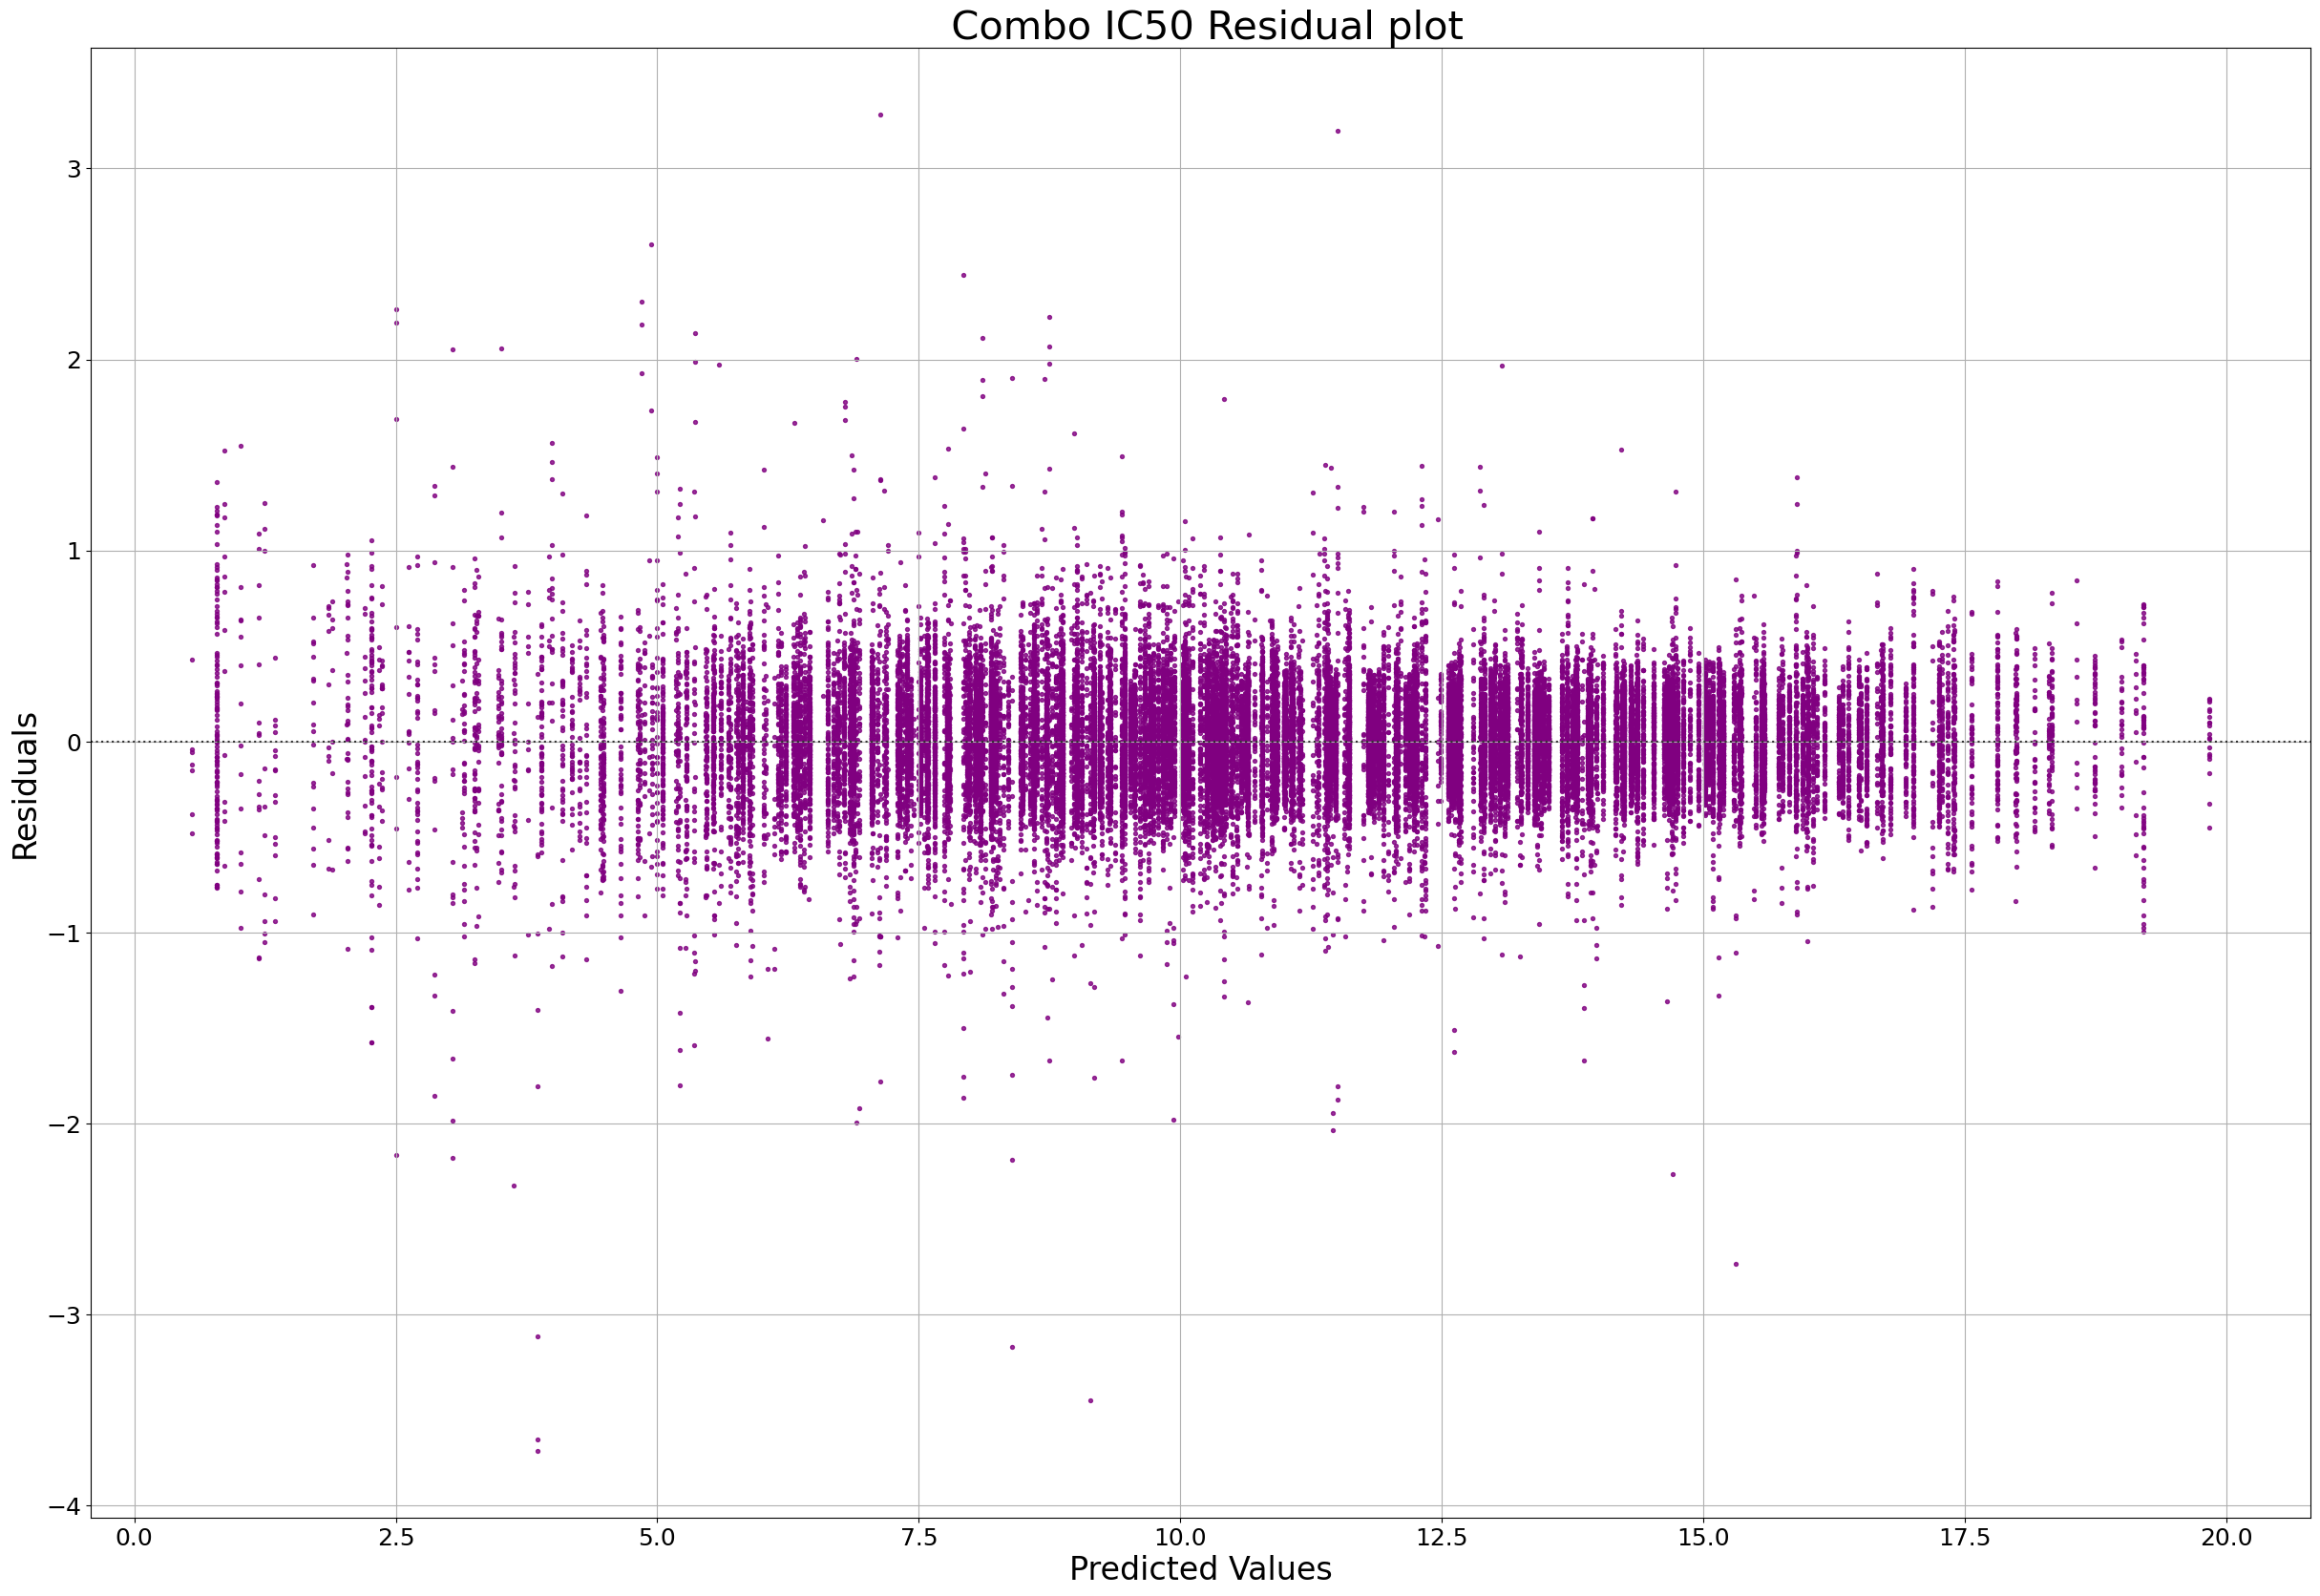

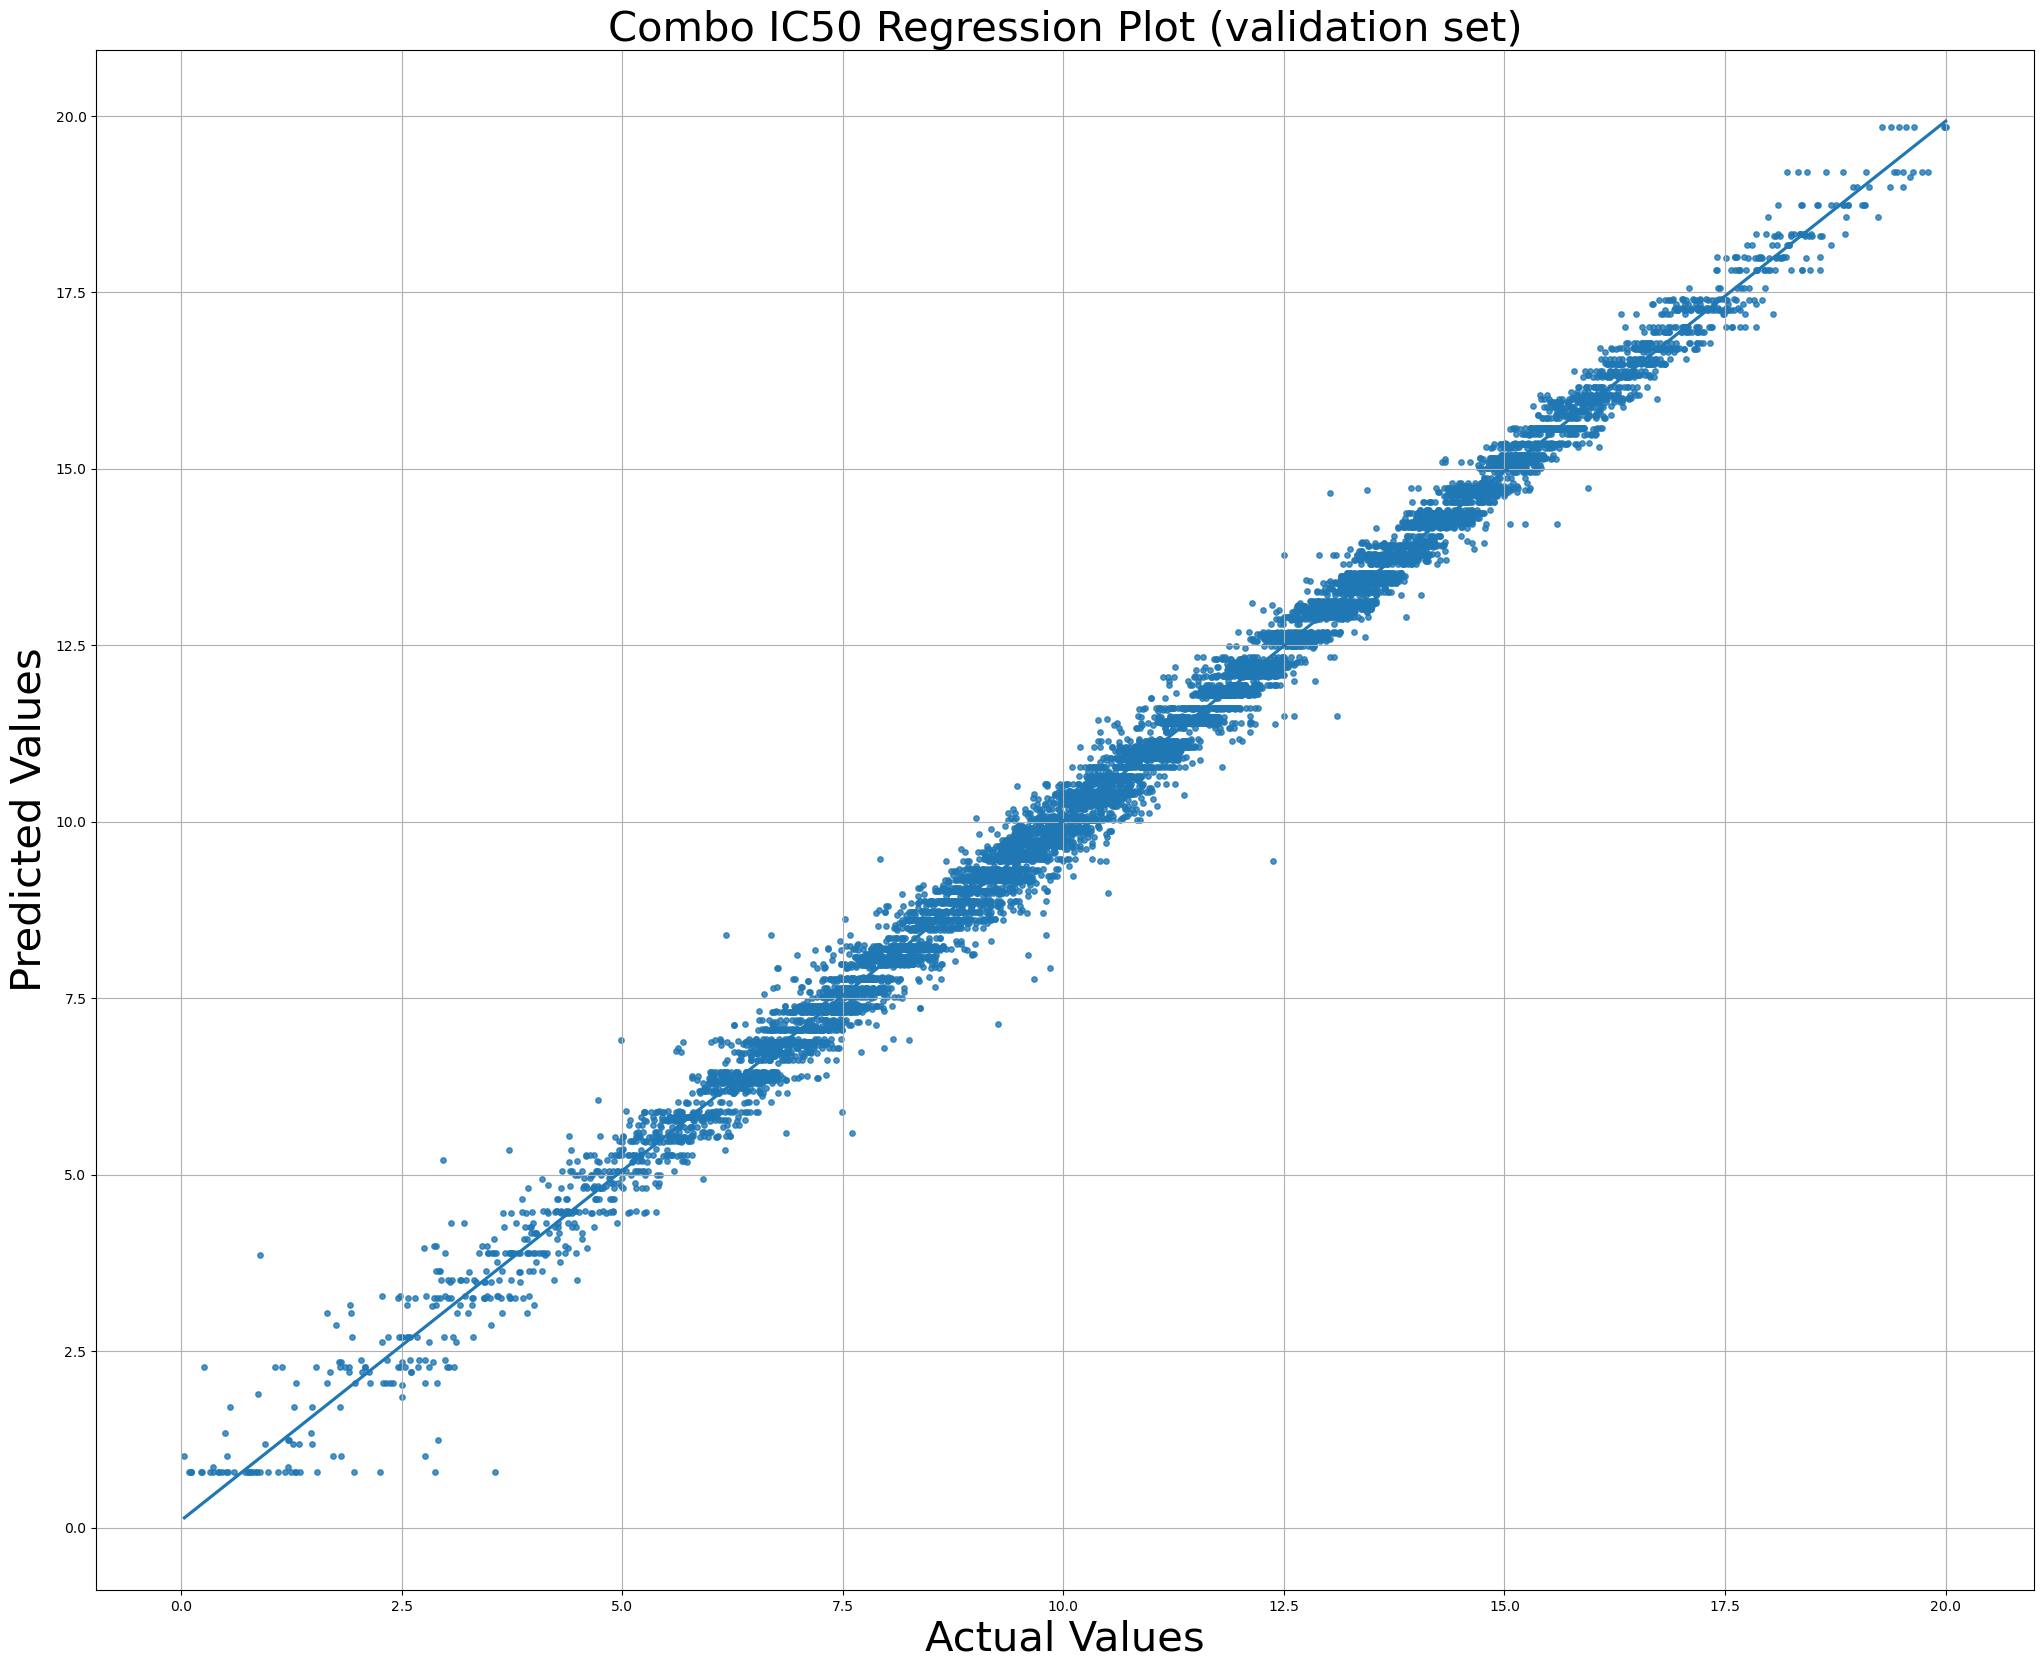

10000 10000


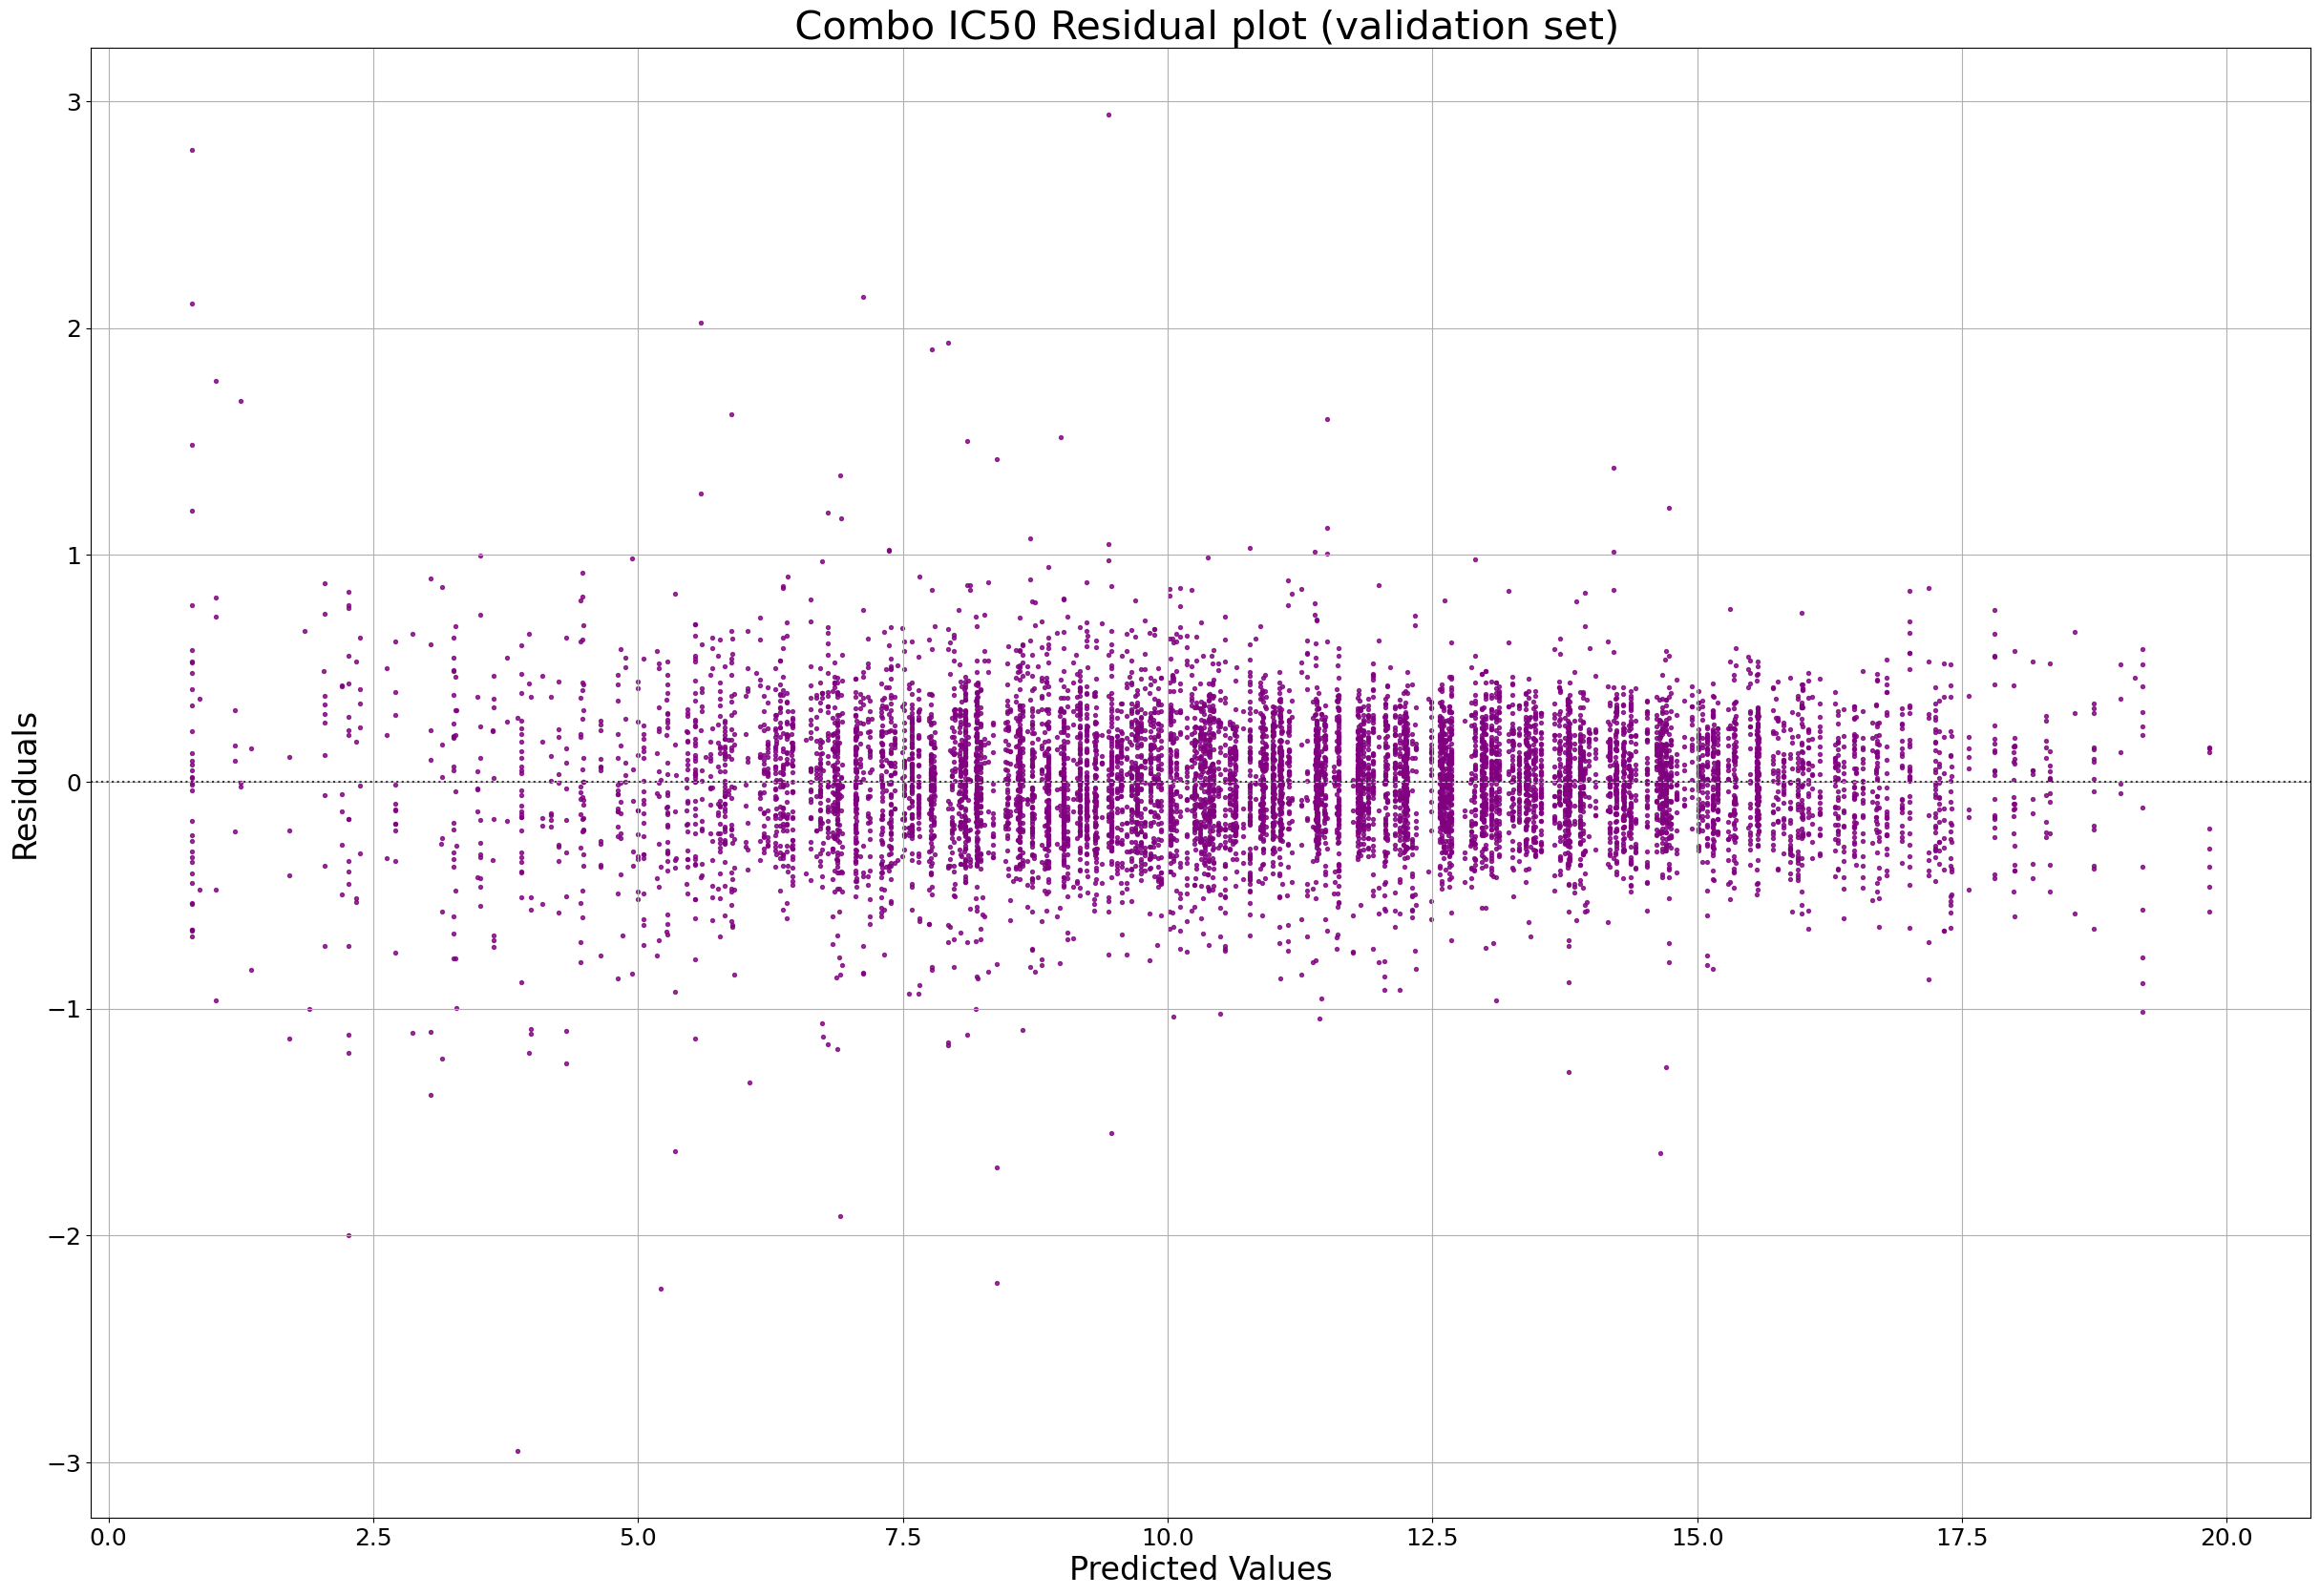

In [14]:
# Make predictions on the test data
Y_pred = cart_model1.predict(X_test)
Y_valid_pred = cart_model1.predict(X_valid)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import numpy as np
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)
evs = explained_variance_score(Y_test, Y_pred)
print("Explained Variance Score:", evs)

# for validation set
import numpy as np
mse = mean_squared_error(Y_valid, Y_valid_pred)
print("Mean Squared Error (validation set):", mse)
rmse = np.sqrt(mean_squared_error(Y_valid, Y_valid_pred))
print("Root Mean Squared Error (validation set):", rmse)
mae = mean_absolute_error(Y_valid, Y_valid_pred)
print("Mean Absolute Error (validation set):", mae)
r2 = r2_score(Y_valid, Y_valid_pred)
print("R-squared (validation set):", r2)
evs = explained_variance_score(Y_valid, Y_valid_pred)
print("Explained Variance Score (validation set):", evs)


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=8)  # 5-fold cross-validation
print("Cross-Validation Scores:", scores)


import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_test = np.array(Y_test)
Y_test = np.ravel(Y_test)
Y_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


# validation data plots

# plots for validation set
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_valid, y=Y_valid_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Combo IC50 Regression Plot (validation set)", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

# residual plot

Y_valid = np.array(Y_valid)
Y_valid = np.ravel(Y_valid)
Y_valid_pred
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_valid - Y_valid_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_valid_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_valid_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title(" Combo IC50 Residual plot (validation set)", fontsize=30)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [6]:
# Create a DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor(max_depth=20)  # You can adjust max_depth for tree depth control
# Fit the model to the training data
cart_model.fit(X_train, Y_train)
# Make predictions on the test data
Y_pred = cart_model.predict(X_test)

X_val = valid_df.drop(columns=['Combo IC50'])  # Replace 'target_column_name' with the actual column name of the target variable
Y_val = valid_df['Combo IC50']
Y_valid_pred = cart_model.predict(X_val)

MemoryError: Unable to allocate 965. MiB for an array with shape (100528, 2516) and data type float32

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) on the test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r_squared = r2_score(Y_test, Y_pred)

In [ ]:
# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean absolute  Error (MAE): {mae}')
print(f'R-squared (R²): {r_squared}')

In [ ]:
# Calculate Mean Squared Error (MSE) and R-squared (R²) on the test data
mse = mean_squared_error(Y_val,Y_valid_pred)
mae = mean_absolute_error(Y_val, Y_valid_pred)
r_squared = r2_score(Y_val, Y_valid_pred)

In [ ]:
# Print the evaluation metrics
print(f'Mean Squared Error valid(MSE): {mse}')
print(f'Mean absolute  Error valid (MAE): {mae}')
print(f'R-squared (R²) valid: {r_squared}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Create a scatterplot with regression line and confidence interval
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'s': 15}, ci=95)

# Add labels and a title
plt.xlabel("Actual Values", fontsize=30)
plt.ylabel("Predicted Values", fontsize=30)
plt.title("Library IC50 Regression Plot", fontsize=30)

# Show the grid
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and actual values 'y_true'
# Replace 'y_pred' and 'y_true' with your actual data

# Calculate residuals
residuals = Y_test - Y_pred
residuals = pd.DataFrame(residuals)
residuals = np.ravel(residuals)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your predicted values 'y_pred' and residuals 'residuals'
# Replace 'y_pred' and 'residuals' with your actual data

# Check the dimensions of 'y_pred' and 'residuals'
print(len(Y_pred), len(residuals))

# Create a residual plot
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Specify the color for the residual points (e.g., 'lightcoral')
sns.residplot(x=Y_pred, y=residuals, scatter_kws={'s': 8, 'color': 'purple'})

plt.xticks(fontsize=18)  # Adjust the fontsize as needed
plt.yticks(fontsize=18)  # Adjust the fontsize as needed

# Add labels and a title with increased font size
plt.xlabel("Predicted Values", fontsize=24)  # Adjust fontsize as needed
plt.ylabel("Residuals", fontsize=24)  # Adjust fontsize as needed
plt.title("Residual Plot for Combo IC50_test set", fontsize=26)  # Adjust fontsize as needed

# Show the grid
plt.grid(True)

# Show the plot
plt.show()
